In [1]:
import  pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('heart_disease_uci.csv')  
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.shape


(920, 16)

In [4]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [5]:
df['age'].mean()

53.51086956521739

In [6]:
df['trestbps'].mean()

132.13240418118468

In [7]:
for column in df.columns:
    if df[column].isnull().all():
        df.drop(column, axis=1, inplace=True)
    elif pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].mean(), inplace=True)
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0


In [8]:

# Step 1: Handle categorical columns by converting them to numeric
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # Convert 'Male'/'Female' to 0/1
# Apply the same for other categorical columns if any

# Step 2: Normalize (Standardize) the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.select_dtypes(include=[float, int]))  # Only numeric columns

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Set number of components according to your need
pca_data = pca.fit_transform(normalized_data)

# Step 4: Normalize the PCA output for training
pca_normalized = MinMaxScaler().fit_transform(pca_data)
pca_normalized

array([[0.38606399, 0.52154113],
       [0.76355561, 0.7603885 ],
       [0.61427268, 0.62495383],
       ...,
       [0.67909389, 0.24154516],
       [0.49104198, 0.3852934 ],
       [0.6663323 , 0.25397883]])

/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

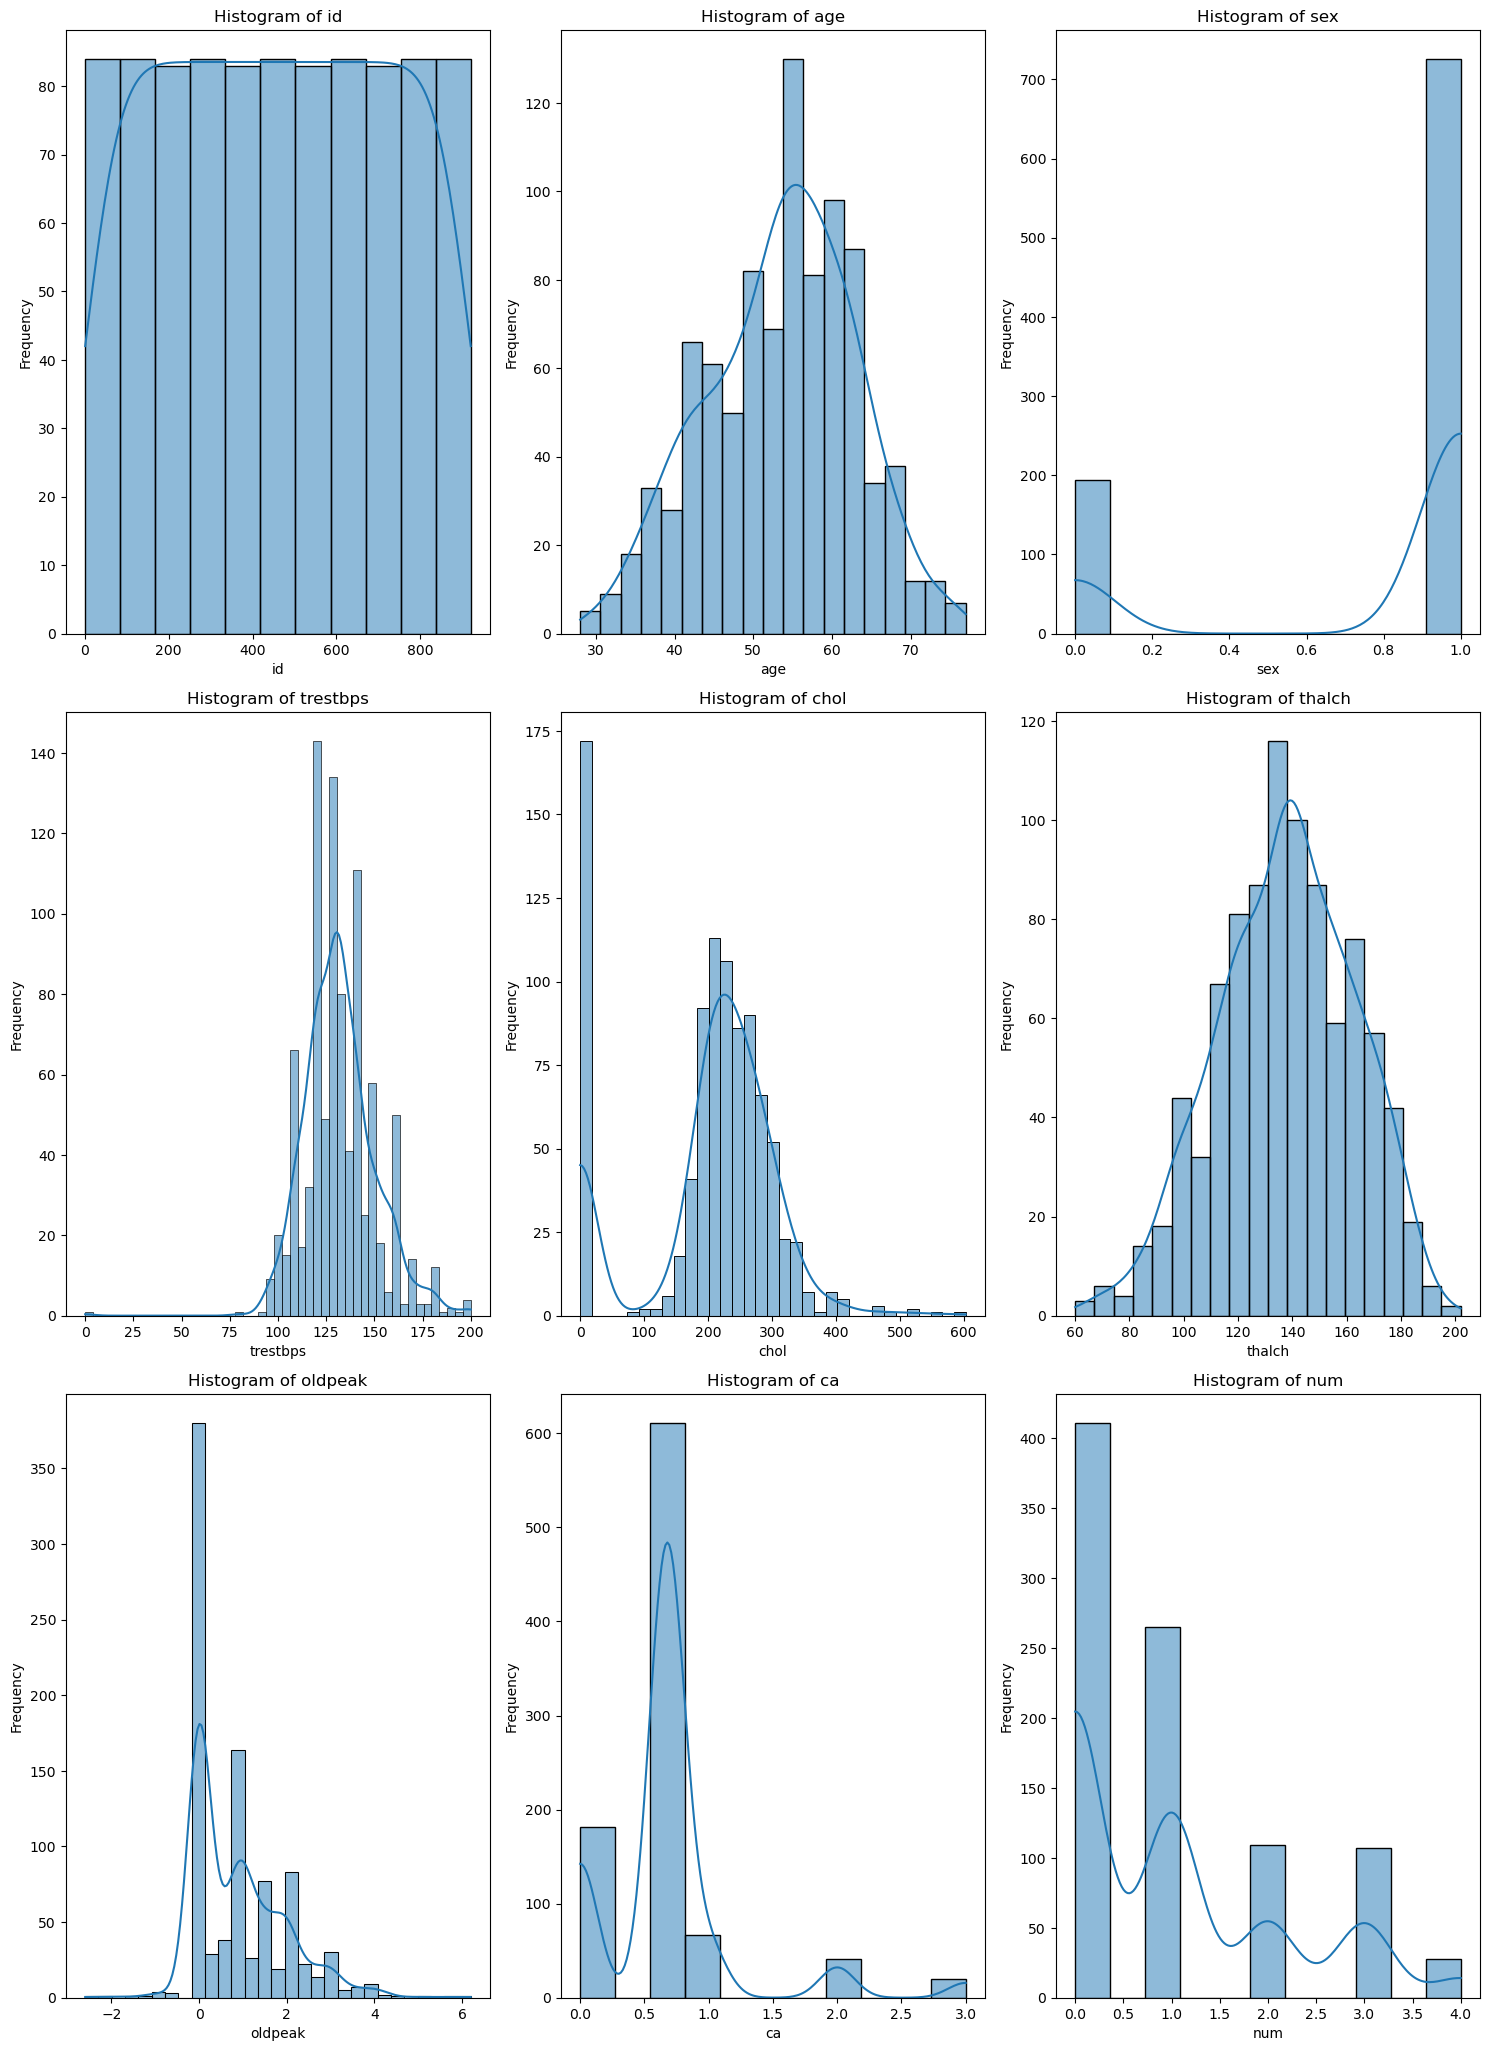

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Set up the plotting grid
numeric_columns = df.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_columns)

# Set figure size
plt.figure(figsize=(15, num_plots * 3))

# Plot histogram for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((num_plots // 3) + 1, 3, i)  # 3 columns per row
    sns.histplot(df[column], kde=True)  # kde=True adds the histogram curve
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


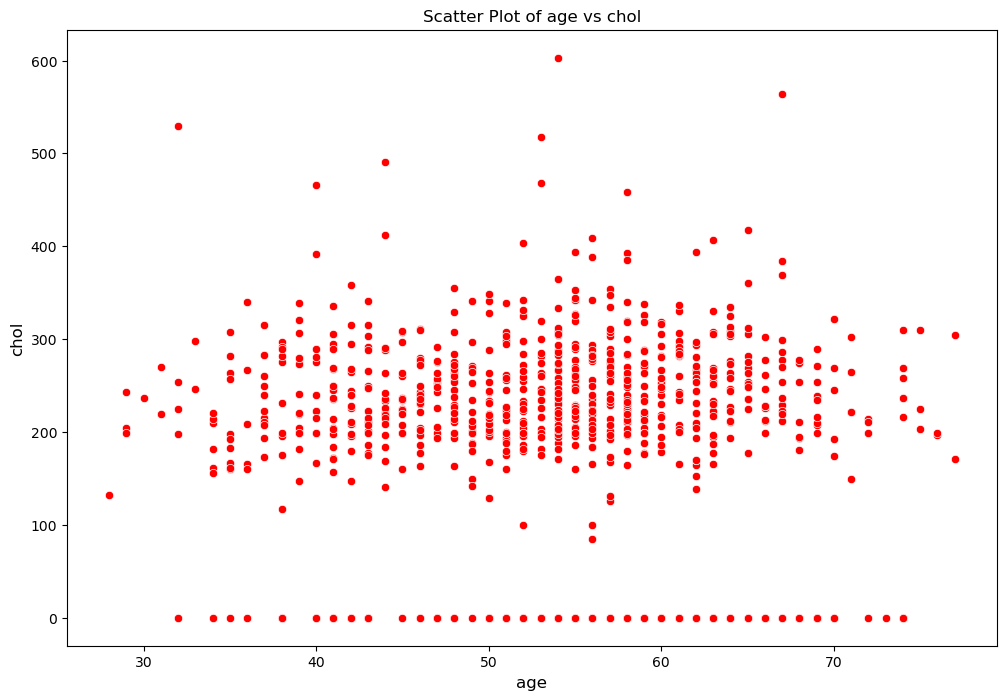

In [13]:

x_column = 'age'  # Replace with the desired x-axis column
y_column = 'chol'  # Replace with the desired y-axis column


plt.figure(figsize=(12, 8))


sns.scatterplot(x=df[x_column], y=df[y_column], color='RED', marker='o')

plt.title(f'Scatter Plot of {x_column} vs {y_column}', fontsize=12)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)

plt.show()


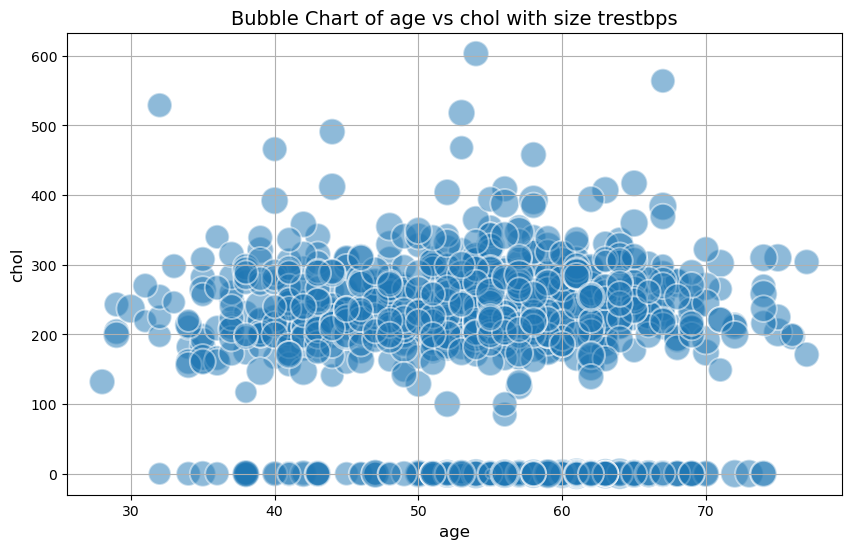

In [14]:

# Specify the columns to plot
x_column = 'age'  # Replace with your desired x-axis column
y_column = 'chol'  # Replace with your desired y-axis column
size_column = 'trestbps'  # Replace with the column for bubble size

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bubble chart
sns.scatterplot(x=df[x_column], y=df[y_column], size=df[size_column], sizes=(50, 500), alpha=0.5, legend=False)

# Add title and labels
plt.title(f'Bubble Chart of {x_column} vs {y_column} with size {size_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)

# Show the grid
plt.grid(True)

# Display the plot
plt.show()

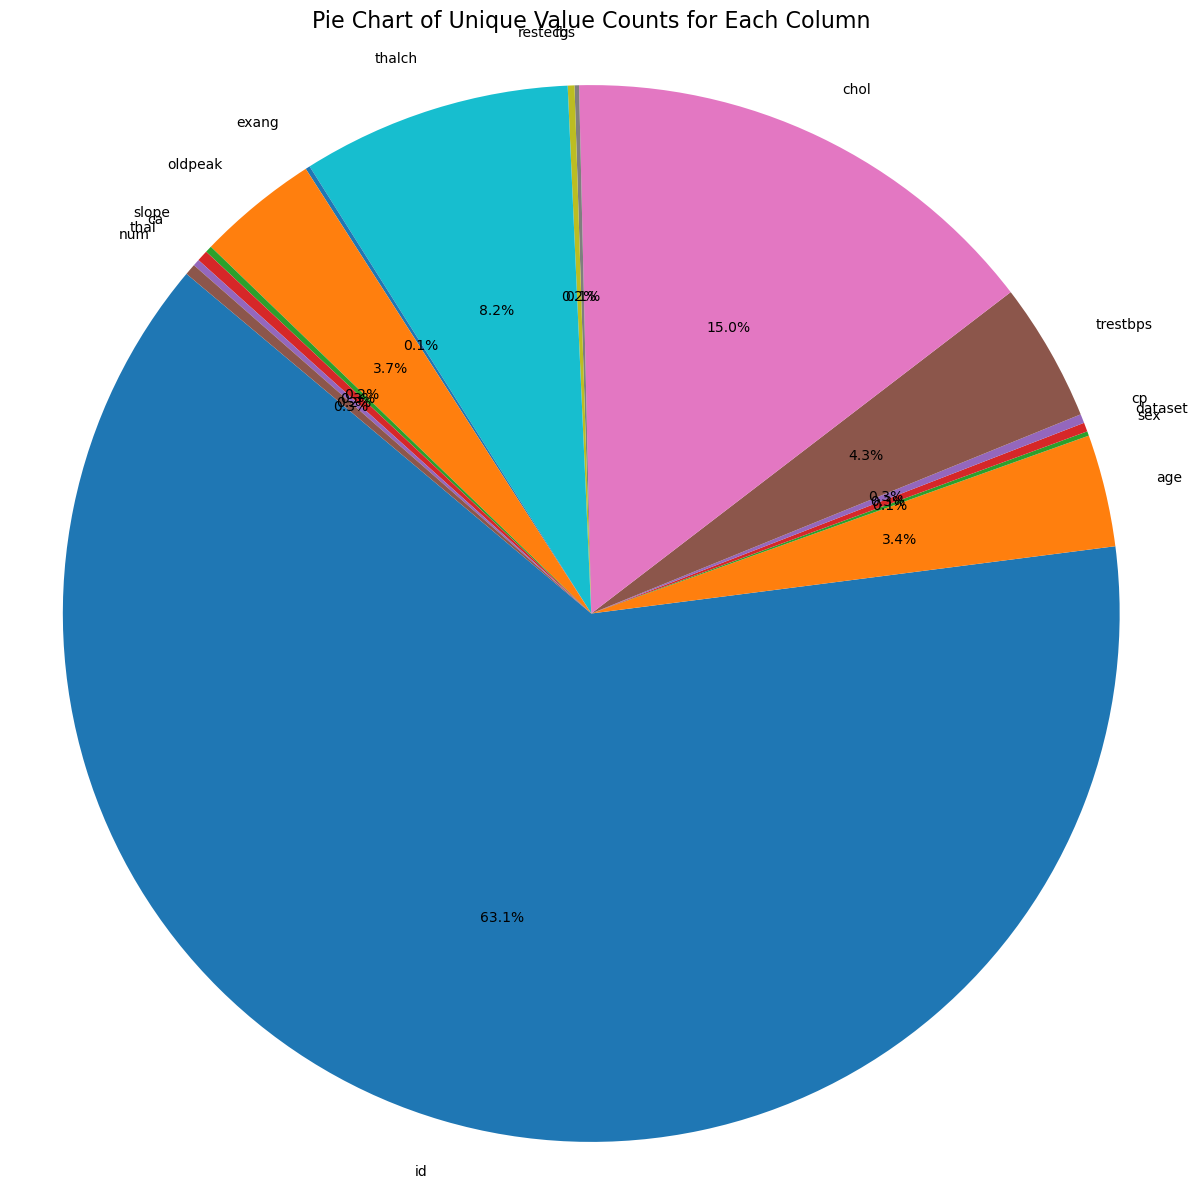

In [15]:


# Calculate the number of unique values in each column
value_counts = df.nunique()

# Prepare data for the pie chart
labels = value_counts.index
sizes = value_counts.values

# Set up the figure
plt.figure(figsize=(15, 15))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Pie Chart of Unique Value Counts for Each Column', fontsize=16)

# Display the chart
plt.show()


<Figure size 1000x600 with 0 Axes>

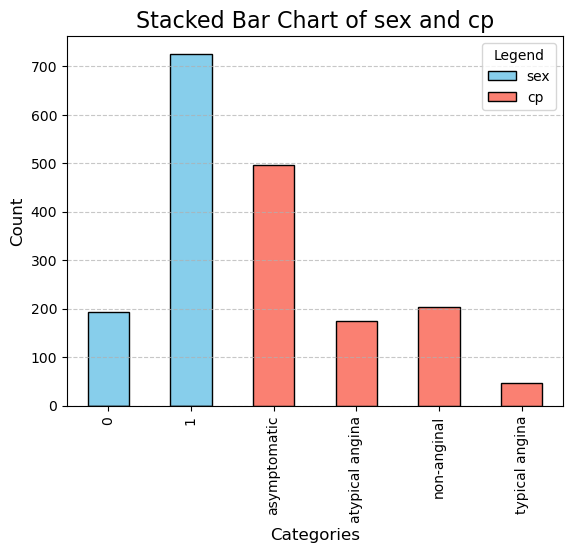

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the two columns you want to stack
column1 = 'sex'  # Replace with your desired first column
column2 = 'cp'   # Replace with your desired second column

# Get the counts of unique values in each column
count_column1 = df[column1].value_counts()
count_column2 = df[column2].value_counts()

# Reindex to align the two Series, filling missing values with 0
stacked_data = pd.DataFrame({
    column1: count_column1.reindex(count_column1.index.union(count_column2.index), fill_value=0),
    column2: count_column2.reindex(count_column1.index.union(count_column2.index), fill_value=0)
})

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

# Add title and labels
plt.title(f'Stacked Bar Chart of {column1} and {column2}', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the legend
plt.legend(title='Legend', fontsize=10)

# Show the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


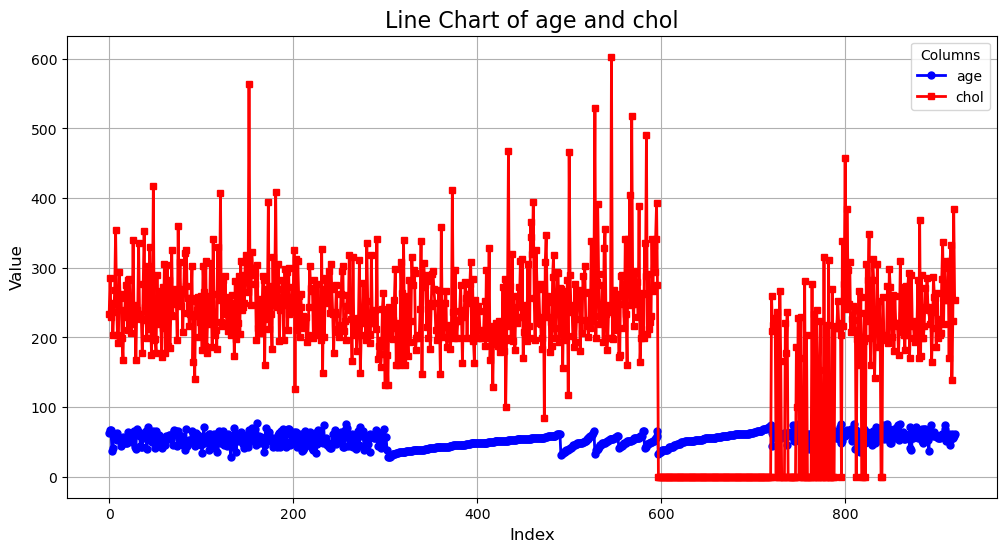

In [17]:
import matplotlib.pyplot as plt

# Specify the two columns you want to plot
column1 = 'age'  # Replace with your desired first column
column2 = 'chol'  # Replace with your desired second column

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the first column
plt.plot(df[column1], label=column1, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)

# Plot the second column
plt.plot(df[column2], label=column2, color='red', marker='s', linestyle='-', linewidth=2, markersize=5)

# Add title and labels
plt.title(f'Line Chart of {column1} and {column2}', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Display the legend
plt.legend(title='Columns', fontsize=10)

# Show the grid
plt.grid()

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

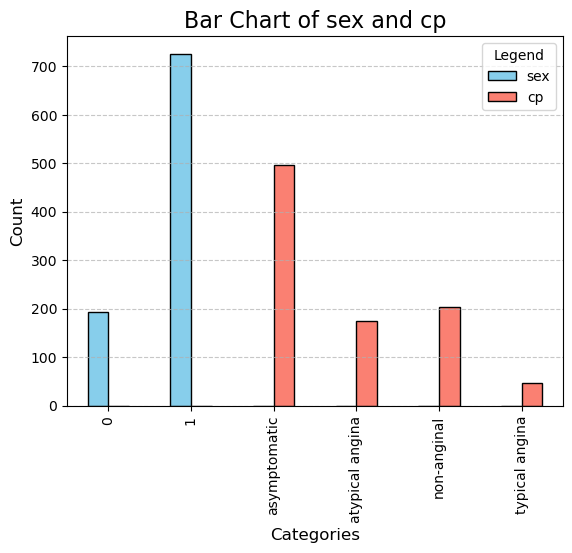

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the two columns you want to plot
column1 = 'sex'  # Replace with your desired first column
column2 = 'cp'   # Replace with your desired second column

# Get the counts of unique values in each column
count_column1 = df[column1].value_counts()
count_column2 = df[column2].value_counts()

# Combine the counts into a DataFrame, reindex to include all categories
combined_index = count_column1.index.union(count_column2.index)
bar_data = pd.DataFrame({
    column1: count_column1.reindex(combined_index, fill_value=0),
    column2: count_column2.reindex(combined_index, fill_value=0)
}).fillna(0)

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar chart
bar_data.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add title and labels
plt.title(f'Bar Chart of {column1} and {column2}', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the legend
plt.legend(title='Legend', fontsize=10)

# Show the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [19]:
import sqlite3

db_path = 'm4_survey_data.sqlite'  # Update with your database path
conn = sqlite3.connect(db_path)

# Query to get all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)

# Print the available tables
print(tables)

conn.close()


                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master


Available tables:
                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master


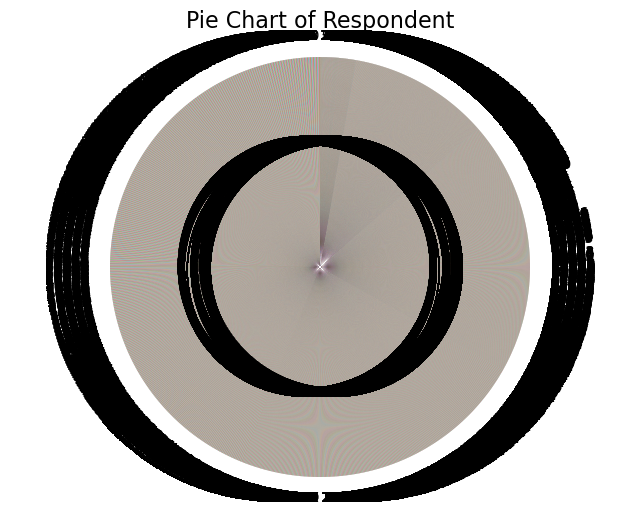

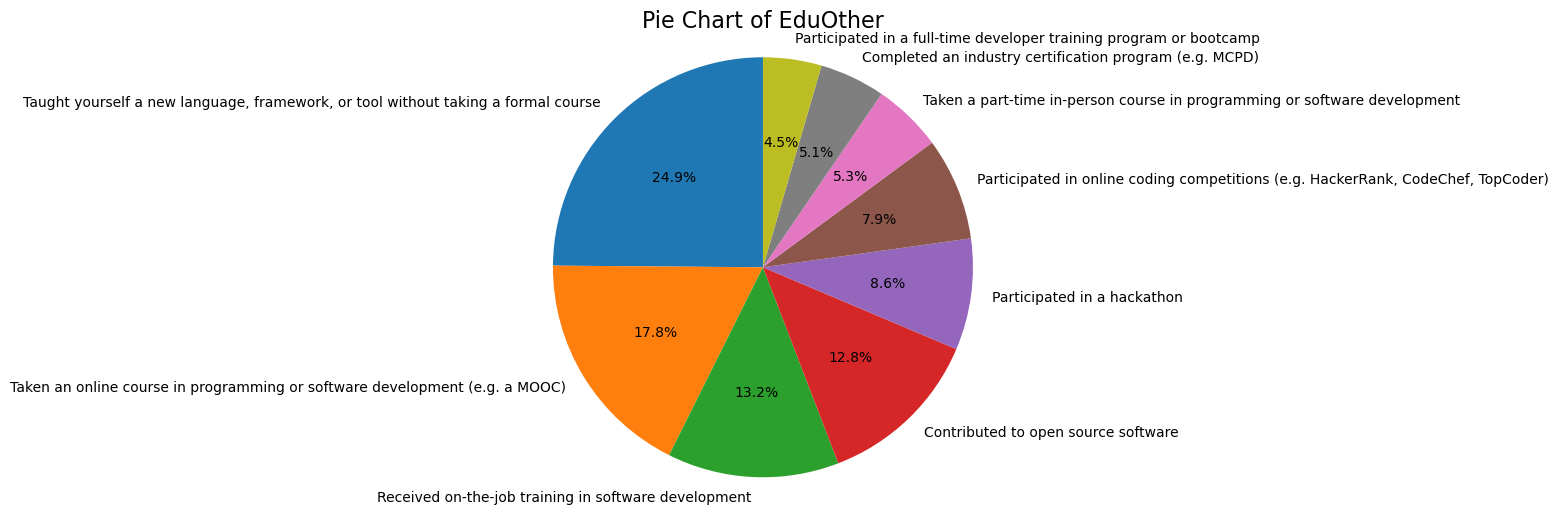

In [20]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
db_path = 'm4_survey_data.sqlite'  # Path to your SQLite database
conn = sqlite3.connect(db_path)

# Query to get all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)

# Print available tables to choose one
print("Available tables:")
print(tables)

# Close the database connection
conn.close()

# Step 2: Read data from the correct table
# Replace 'actual_table_name' with the name of the table you want to access
table_name = tables.iloc[0, 0]  # Choose the first table for demonstration
conn = sqlite3.connect(db_path)
query = f'SELECT * FROM {table_name}'
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Step 3: Create pie charts for each column based on unique value counts
for column in df.columns:
    # Count the number of unique values (categories) in the column
    counts = df[column].value_counts()
    
    # Only proceed if the column has more than 1 unique value
    if len(counts) > 1:
        plt.figure(figsize=(8, 6))
        
        # Create a pie chart
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {column}', fontsize=16)
        plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
        
        # Show the pie chart
        plt.show()


In [21]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
# Step 1: Connect to the SQLite database
db_path = 'm4_survey_data.sqlite'  # Path to your SQLite database
conn = sqlite3.connect(db_path)

# Query to get all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)

# Print available tables to choose one
print("Available tables:")
print(tables)

# Close the database connection
conn.close()


# Step 3: Check column names
print("Columns available in the DataFrame:")
print(df.columns)

# Step 3: Select two columns to plot in the line chart
column1 = 'Respondent'  # Replace with a relevant column if available
column2 = 'EduOther'  # Replace with a relevant column if available

if column1 in df.columns and column2 in df.columns:
    # Get the counts for each column
    count_column1 = df[column1].value_counts()
    count_column2 = df[column2].value_counts()

    # Combine the counts into a DataFrame
    stacked_data = pd.DataFrame({column1: count_column1, column2: count_column2}).fillna(0)

    # Step 5: Create the stacked bar chart
    plt.figure(figsize=(10, 6))

    # Plot the stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')

    # Add title and labels
    plt.title(f'Stacked Bar Chart of {column1} and {column2}', fontsize=16)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Display the legend
    plt.legend(title='Legend', fontsize=10)

    # Show the grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()
else:
    print(f"One or both of the columns '{column1}' and '{column2}' are not found in the DataFrame.")


Available tables:
                      name
0                 EduOther
1                  DevType
2                  LastInt
3               JobFactors
4                 WorkPlan
5            WorkChallenge
6       LanguageWorkedWith
7   LanguageDesireNextYear
8       DatabaseWorkedWith
9   DatabaseDesireNextYear
10      PlatformWorkedWith
11  PlatformDesireNextYear
12      WebFrameWorkedWith
13  WebFrameDesireNextYear
14      MiscTechWorkedWith
15  MiscTechDesireNextYear
16              DevEnviron
17              Containers
18               SOVisitTo
19            SONewContent
20                  Gender
21               Sexuality
22               Ethnicity
23                  master
Columns available in the DataFrame:
Index(['Respondent', 'EduOther'], dtype='object')


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

db_path = 'm4_survey_data.sqlite'  # Path to your SQLite database
conn = sqlite3.connect(db_path)

# Query to get all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)

# Print available tables to choose one
print("Available tables:")
print(tables)

# Close the database connection
conn.close()


# Step 3: Check the available columns
print("Available columns in the DataFrame:", df.columns)
# Step 3: Select two columns to plot in the line chart
column1 = 'Respondent'  # Replace with a relevant column if available
column2 = 'EduOther'  # Replace with a relevant column if available

# Ensure the selected columns exist in the DataFrame
if column1 not in df.columns or column2 not in df.columns:
    print(f"Error: '{column1}' or '{column2}' not found in the DataFrame.")
else:
    # Step 5: Plot the line chart for the selected columns
    plt.figure(figsize=(10, 6))

    # Plot column1
    plt.plot(df.index, df[column1], label=column1, color='blue', linestyle='-', marker='o')

    # Plot column2
    plt.plot(df.index, df[column2], label=column2, color='green', linestyle='--', marker='x')

    # Step 6: Customize the chart
    plt.title(f'Line Chart of {column1} and {column2}', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('Values', fontsize=12)

    # Add a legend
    plt.legend()

    # Show grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()
